# **Long Term Forecasting**

Prophet model forecast time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. <br> Prophet is robust to outliers, missing data, and dramatic changes in time series.

The model decompose the time series with three main model components: trend, seasonality, and holidays.

y(t) = g(t) + s(t) + h(t) + e(t)<br><br>
where:<br>
* g(t)=the trend component , models non-periodic changes, which reflects the long-term progression of the series.A trend exists when there is a persistent increasing or decreasing direction in the data. The trend component does not have to be linear.
<br>
* s(t)= the seasonal component,reflecting seasonality (seasonal variation). A seasonal pattern exists when a time series is influenced by seasonal factors.
<br>
* h(t)=effects of holidays
<br>
* e(t)=the irregular component (or "noise"),which describes random, irregular influences. It represents the residuals or remainder of the time series after the other components have been removed.

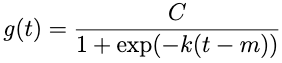

where:<br>
* C is the carrying capacity
* k is the growth rate
* m is an offset parameter

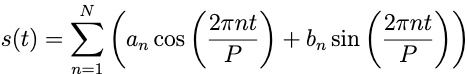

# Data Loading and Processing

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
# Loading the data in the environment
data=pd.read_csv('/content/long1.csv')

In [3]:
# Data pre-processing
# Converting the data to desired form
cols=["YEAR","MO","DY"]
data['date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")      # joining the dates into one coloumn
data['date']=pd.to_datetime(data['date'])                                                      # converting dates from string to datetime
data=data.drop(['LAT','LON',"YEAR","MO","DY"],axis=1)                                          # dropping coloumns which are not required
data.rename(columns = {'ALLSKY_SFC_SW_DWN':'y','date':'ds'}, inplace = True)                   # renaming the coloumns
data=data[['ds','y']]                                                                          # rearranging the coloums
data.head()                                                                                    # shows top 5 data from the dataframe

,ds,y
0,2016-01-01,4.30
1,2016-01-02,4.23
2,2016-01-03,4.17
3,2016-01-04,4.36
4,2016-01-05,4.15


# Training the model

In [4]:
from fbprophet import Prophet    # importing the model

As Insolation doesnt varies weekly or daily, we keep those two parameters as False.

In [65]:
# initializing the model with specific parameters
model = Prophet(yearly_seasonality = 5,weekly_seasonality=False,daily_seasonality=False)


In [66]:
# Training the model
model.fit(data)


In [79]:
future = model.make_future_dataframe(periods=365 * 2)   # Creating future dataframe
forecast = model.predict(future)                        # Predicting the values for future

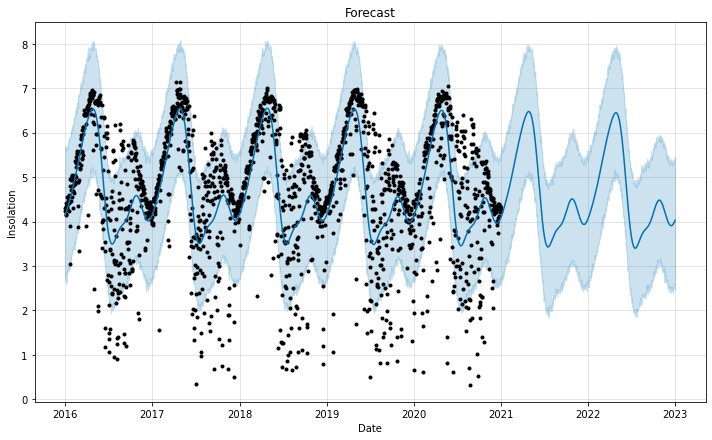

In [80]:
# visulising the results
fig = model.plot(forecast, xlabel='Date',
ylabel=r'Insolation')
plt.title('Forecast')

plt.show()

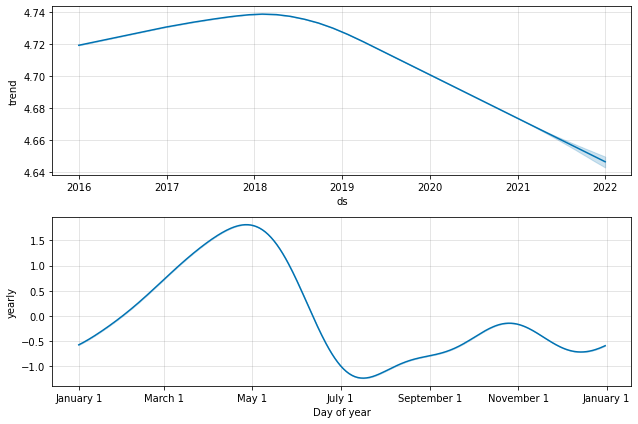

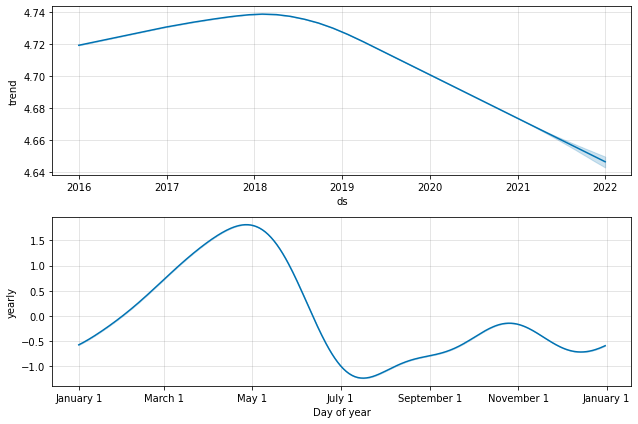

In [69]:
model.plot_components(forecast)

# Testing

Calculating RMSE of data from JAN to MAR 2021

In [70]:
# Collecting the data from prediction datafram from jan to march 2021 
df=forecast[['ds', 'yhat']][-365:-365+90]

In [11]:
# Actual data from website.(https://power.larc.nasa.gov/data-access-viewer/)
new_data=pd.read_csv('/content/sample_data/march.csv')

In [13]:
# processing the data to desired form
cols=["YEAR","MO","DY"]
new_data['date'] = new_data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
new_data['date']=pd.to_datetime(new_data['date'])
new_data=new_data.drop(['LAT','LON',"YEAR","MO","DY"],axis=1)
new_data.rename(columns = {'ALLSKY_SFC_SW_DWN':'y','date':'ds'}, inplace = True)
new_data=new_data[['ds','y']]
new_data.head()

,ds,y
0,2021-01-01,4.34
1,2021-01-02,4.40
2,2021-01-03,4.32
3,2021-01-04,4.36
4,2021-01-05,3.92


In [71]:
actual_value=new_data['y'].to_numpy()  # storing actual values in the array
pred_value=df['yhat'].to_numpy()       # storing predicted values in the array

In [72]:
# calculating RMSE
m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(actual_value, pred_value)
m.result().numpy()

0.49878967